# Libraries

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [54]:
df_csv = pd.read_csv("../data/csv_projectII.csv")

In [55]:
df_csv.sort_values(by = "order", inplace=True)

In [56]:
sns.set(rc={"figure.figsize": (5, 4)}, font_scale=0.75)
sns.set_style("white")

In [57]:
df_csv.columns

Index(['order', 'titles', 'authors', 'genres', 'editorial', 'countries',
       'languages', 'orig_language', 'pages', 'dates'],
      dtype='object')

In [45]:
df_csv["pages"].describe()

count    100.000000
mean     335.540000
std      168.939617
min       24.000000
25%      200.000000
50%      312.000000
75%      448.000000
max      936.000000
Name: pages, dtype: float64

In [46]:
df_csv["languages"].value_counts()

languages
Español    100
Name: count, dtype: int64

In [47]:
df_csv["orig_language"].value_counts().head()

orig_language
Español    63
Inglés     20
Francés     6
Japonés     4
Sueco       2
Name: count, dtype: int64

In [48]:
df_csv["editorial"].value_counts().head()

editorial
Editorial Anagrama            6
ALFAGUARA                     6
Booket                        5
Destino Infantil & Juvenil    5
B (Ediciones B)               5
Name: count, dtype: int64

In [49]:
df_csv["countries"].value_counts().head()

countries
España    100
Name: count, dtype: int64

In [50]:
df_csv.sample()

,order,titles,authors,genres,editorial,countries,languages,orig_language,pages,dates
63,96,El hijo del padre,"del Árbol, Víctor",Obra de misterio y suspense,Ediciones Destino,España,Español,Español,416,2021-03-10


In [51]:
df_csv["dates"].info

<bound method Series.info of 23    2021-03-25
28    2021-03-11
36    2021-03-03
45    2021-03-15
53    2018-09-19
         ...    
63    2021-03-10
82    2020-09-15
87    2021-03-17
89    2019-11-11
94    2020-01-28
Name: dates, Length: 100, dtype: object>

In [60]:
df_csv["dates"] = pd.to_datetime(df_csv["dates"])

In [61]:
df_csv["dates"].describe()

count                    100
mean     2020-05-01 00:57:36
min      2007-09-01 00:00:00
25%      2020-08-17 12:00:00
50%      2021-01-24 00:00:00
75%      2021-03-10 06:00:00
max      2021-03-31 00:00:00
Name: dates, dtype: object

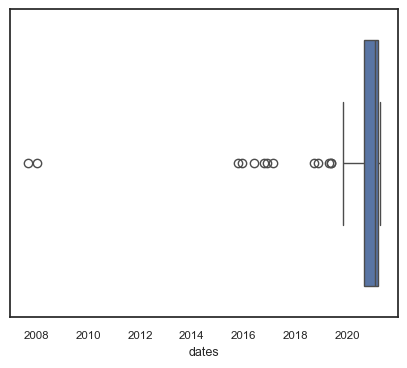

In [63]:
sns.boxplot(x = "dates", data = df_csv); # The bestsellers of 2020 were published mainly in 2020

In [80]:
if df_csv["editorial"].value_counts() > 1:
    sns.countplot(x=df_csv["editorial"])


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().